In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyspark import SparkContext
from pyspark.mllib.fpm import FPGrowth

In [28]:
df = pd.read_csv("games.csv")

In [29]:
df

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71711,2159120,SUR5,"Apr 1, 2023",0 - 0,0,0,0.00,0,"Innovative Gameplay SUR5 brings a brand new, f...","['English', 'Polish', 'Spanish - Latin America']",...,0,0,0,Katharsis,Katharsis,"Single-player,Multi-player,PvP,Online PvP,Stea...","Free to Play,Indie,Massively Multiplayer,Strat...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71712,2125160,Prison Life 2,"Mar 30, 2023",0 - 20000,6,0,10.79,0,Core Features Real players only! All Guards an...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,AO Games,AO Games,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Casual,Indie,RPG,Simulation,Strategy","First-Person,Detective,Social Deduction,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71713,2318860,Architecture Zeitgeist,"Mar 27, 2023",0 - 20000,0,0,5.99,0,Architecture Zeitgeist is a game created with ...,"['English', 'Japanese', 'Portuguese - Brazil',...",...,0,0,0,Matheus Rudo,Rudo Studios,Single-player,"Casual,Simulation,Early Access","Casual,Simulation,Puzzle,Exploration,Immersive...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71714,2180330,Girl's Way to Survive 2: Bloody Museum,"Apr 2, 2023",0 - 0,0,0,2.39,0,"Development progress: prologue map (finished),...",['Simplified Chinese'],...,0,0,0,绅士游戏工坊,绅士游戏工坊,Single-player,"Action,Casual,Indie,RPG,Early Access",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [30]:
df.describe()

,AppID,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,7.171600e+04,71716.000000,71716.000000,71716.000000,71716.000000,71716.000000,71716.000000,7.171600e+04,71716.000000,42.000000,71716.000000,7.171600e+04,71716.000000,71716.000000,71716.000000,71716.000000
mean,1.199222e+06,140.761197,0.343494,7.223055,0.615386,3.834207,0.044969,1.114753e+03,182.115525,98.904762,21.641977,8.981185e+02,119.158709,11.734690,106.873738,12.580833
std,5.982238e+05,5797.005513,2.362128,11.072051,14.932853,16.437707,1.901272,2.652246e+04,4975.205765,0.878178,185.583590,1.947627e+04,1230.102924,203.818348,1641.336319,221.150372
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.005350e+05,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.176745e+06,0.000000,0.000000,4.990000,0.000000,0.000000,0.000000,9.000000e+00,3.000000,99.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.692255e+06,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,5.900000e+01,18.000000,100.000000,19.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2.379920e+06,872138.000000,21.000000,999.000000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,100.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


In [31]:
df.dtypes

AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Header image                   object
Website                        object
Support url                    object
Support email                  object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Metacritic url                 object
User score                      int64
Positive                        int64
Negative                        int64
Score rank                    float64
Achievements                    int64
Recommendati

In [32]:
df.isnull().sum()

AppID                             0
Name                              1
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 2436
Supported languages               0
Full audio languages              0
Reviews                       62549
Header image                      0
Website                       36643
Support url                   35466
Support email                 11120
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                67938
User score                        0
Positive                          0
Negative                          0
Score rank                    71674
Achievements                      0
Recommendations                   0
Notes                       

In [33]:
df_filtered = df.dropna(subset=['Genres'])
df_filtered.isnull().sum()

AppID                             0
Name                              0
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                   79
Supported languages               0
Full audio languages              0
Reviews                       60118
Header image                      0
Website                       34251
Support url                   33084
Support email                  8721
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                65504
User score                        0
Positive                          0
Negative                          0
Score rank                    69235
Achievements                      0
Recommendations                   0
Notes                       

In [34]:
df_filtered

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71711,2159120,SUR5,"Apr 1, 2023",0 - 0,0,0,0.00,0,"Innovative Gameplay SUR5 brings a brand new, f...","['English', 'Polish', 'Spanish - Latin America']",...,0,0,0,Katharsis,Katharsis,"Single-player,Multi-player,PvP,Online PvP,Stea...","Free to Play,Indie,Massively Multiplayer,Strat...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71712,2125160,Prison Life 2,"Mar 30, 2023",0 - 20000,6,0,10.79,0,Core Features Real players only! All Guards an...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,AO Games,AO Games,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Casual,Indie,RPG,Simulation,Strategy","First-Person,Detective,Social Deduction,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71713,2318860,Architecture Zeitgeist,"Mar 27, 2023",0 - 20000,0,0,5.99,0,Architecture Zeitgeist is a game created with ...,"['English', 'Japanese', 'Portuguese - Brazil',...",...,0,0,0,Matheus Rudo,Rudo Studios,Single-player,"Casual,Simulation,Early Access","Casual,Simulation,Puzzle,Exploration,Immersive...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71714,2180330,Girl's Way to Survive 2: Bloody Museum,"Apr 2, 2023",0 - 0,0,0,2.39,0,"Development progress: prologue map (finished),...",['Simplified Chinese'],...,0,0,0,绅士游戏工坊,绅士游戏工坊,Single-player,"Action,Casual,Indie,RPG,Early Access",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [35]:
#function to turn estimated players into a number
#splits the a string range in the form  "x - y" into two integers x and y, then returns the average of the two integers
def players(estimated):
    a = estimated.split(" - ")

    b1 = int(a[0])
    b2 = int(a[1])

    c = (b1 + b2) / 2
    return c

#apply the function players to the column 'Estimated owners'
df_filtered['Estimated owners'] = df_filtered['Estimated owners'].apply(players)
df_filtered

C:\Users\sayex\AppData\Local\Temp\ipykernel_12164\2629499225.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Estimated owners'] = df_filtered['Estimated owners'].apply(players)


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",10000.0,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",10000.0,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",10000.0,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",10000.0,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",10000.0,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71711,2159120,SUR5,"Apr 1, 2023",0.0,0,0,0.00,0,"Innovative Gameplay SUR5 brings a brand new, f...","['English', 'Polish', 'Spanish - Latin America']",...,0,0,0,Katharsis,Katharsis,"Single-player,Multi-player,PvP,Online PvP,Stea...","Free to Play,Indie,Massively Multiplayer,Strat...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71712,2125160,Prison Life 2,"Mar 30, 2023",10000.0,6,0,10.79,0,Core Features Real players only! All Guards an...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,AO Games,AO Games,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Casual,Indie,RPG,Simulation,Strategy","First-Person,Detective,Social Deduction,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71713,2318860,Architecture Zeitgeist,"Mar 27, 2023",10000.0,0,0,5.99,0,Architecture Zeitgeist is a game created with ...,"['English', 'Japanese', 'Portuguese - Brazil',...",...,0,0,0,Matheus Rudo,Rudo Studios,Single-player,"Casual,Simulation,Early Access","Casual,Simulation,Puzzle,Exploration,Immersive...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71714,2180330,Girl's Way to Survive 2: Bloody Museum,"Apr 2, 2023",0.0,0,0,2.39,0,"Development progress: prologue map (finished),...",['Simplified Chinese'],...,0,0,0,绅士游戏工坊,绅士游戏工坊,Single-player,"Action,Casual,Indie,RPG,Early Access",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [36]:
df_filtered = df_filtered[df_filtered['Median playtime forever'] >= 60]

In [37]:
df_filtered

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
9,320150,Deadlings: Rotten Edition,"Nov 11, 2014",75000.0,0,0,3.99,0,Death is lonely. He has zero friends on his Fa...,"['English', 'Polish', 'French', 'Italian', 'Ge...",...,0,782,0,ONE MORE LEVEL,ONE MORE LEVEL,"Single-player,Steam Achievements,Steam Trading...","Action,Adventure,Indie","Action,Indie,Adventure,Puzzle-Platformer,Arcad...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
10,1026420,WARSAW,"Oct 2, 2019",35000.0,5,0,23.99,0,Use everything at your disposal to help a team...,"['English', 'French', 'German', 'Polish', 'Rus...",...,0,93,0,Pixelated Milk,"Pixelated Milk,gaming company","Single-player,Steam Achievements,Steam Trading...","Indie,RPG","Tactical RPG,Turn-Based Strategy,Wargame,Histo...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
11,485000,Cthulhu Realms,"Jul 1, 2016",75000.0,0,0,0.00,1,Star Realms has gone insane! Introducing Cthul...,['English'],...,0,257,0,"Wise Wizard Games, LLC","Wise Wizard Games, LLC","Single-player,Multi-player,Shared/Split Screen...",Strategy,"Card Game,Strategy,Deckbuilding,Lovecraftian,B...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
17,346560,Hero of the Kingdom II,"Feb 20, 2015",150000.0,5,0,7.99,0,Sail to the farthest islands to save your sist...,"['English', 'French', 'German', 'Spanish - Spa...",...,0,303,0,Lonely Troops,Lonely Troops,"Single-player,Steam Achievements,Steam Trading...","Adventure,Casual,Indie,RPG","Adventure,Casual,Point & Click,RPG,Indie,Isome...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
21,575760,Project: R.E.B.O.O.T 2,"Jan 27, 2017",35000.0,10,0,2.99,0,Meet the continuation of the hardcore platform...,['English'],...,0,289,0,Volens Nolens Games,Volens Nolens Games,"Single-player,Steam Trading Cards","Action,Adventure,Casual,Indie","Action,Adventure,Casual,Indie,Platformer,2D Pl...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71584,768200,Smalland: Survive the Wilds,"Mar 29, 2023",150000.0,11894,0,22.49,0,"'Before the time of the giants, we lived freel...","['English', 'French', 'German', 'Spanish - Spa...",...,199,199,199,Merge Games,Merge Games,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Adventure,Indie,RPG,Early Access","Early Access,Survival,Open World Survival Craf...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71615,2138710,Sifu,"Mar 28, 2023",75000.0,2196,17,35.99,3,Whether you choose to play as a male or a fema...,"['English', 'French', 'Italian', 'German', 'Sp...",...,87,95,95,Sloclap,"Sloclap,Kepler Interactive","Single-player,Steam Achievements,Full controll...","Action,Indie","Action,Beat 'em up,Third Person,Difficult,Mart...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71653,1562430,DREDGE,"Mar 30, 2023",150000.0,10464,0,24.99,3,Captain your fishing trawler to explore a coll...,"['English', 'French', 'Italian', 'German', 'Sp...",...,182,182,182,Black Salt Games,Team17,"Single-player,Steam Achievements,Full controll...","Adventure,RPG","Fishing,Exploration,Adventure,Lovecraftian,Mys...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71667,1888930,The Last of Us™ Part I,"Mar 28, 2023",750000.0,17498,17,59.99,0,Experience the emotional storytelling and unfo...,"['English', 'Italian', 'Spanish - Spain', 'Cze...",...,592,797,797,Naughty Dog LLC,PlaySta

In [38]:
df_filtered.describe()

,AppID,Estimated owners,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,1.099500e+04,1.099500e+04,10995.000000,10995.000000,10995.000000,10995.000000,10995.000000,10995.000000,1.099500e+04,10995.000000,12.000000,10995.000000,1.099500e+04,10995.000000,10995.000000,10995.000000,10995.000000
mean,6.223164e+05,4.997917e+05,888.052933,1.125057,12.108367,2.313597,18.483220,0.083402,6.665471e+03,1043.125784,99.000000,40.080764,5.182962e+03,755.227103,72.229377,689.925239,77.317326
std,4.207595e+05,2.762727e+06,14781.578636,4.184235,12.186993,35.239471,32.397156,2.587992,6.714684e+04,12600.508646,0.953463,211.507701,4.630498e+04,3054.233395,474.745588,4143.820298,520.409650
min,1.000000e+01,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,31.000000,0.000000,60.000000,0.000000
25%,3.316050e+05,3.500000e+04,1.000000,0.000000,2.990000,0.000000,0.000000,0.000000,1.270000e+02,36.000000,98.750000,0.000000,0.000000e+00,167.000000,0.000000,168.000000,0.000000
50%,4.978000e+05,7.500000e+04,4.000000,0.000000,9.990000,0.000000,0.000000,0.000000,4.800000e+02,108.000000,99.000000,20.000000,4.060000e+02,267.000000,0.000000,262.000000,0.000000
75%,8.449250e+05,3.500000e+05,37.000000,0.000000,17.990000,1.000000,10.000000,0.000000,1.924500e+03,355.500000,100.000000,39.000000,1.669000e+03,520.000000,0.000000,461.000000,0.000000
max,2.262770e+06,1.500000e+08,872138.000000,21.000000,299.900000,2366.000000,97.000000,98.000000,5.764420e+06,895978.000000,100.000000,5394.000000,3.441592e+06,145727.000000,10996.000000,208473.000000,10996.000000


In [39]:
df_filtered.dtypes

AppID                           int64
Name                           object
Release date                   object
Estimated owners              float64
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Header image                   object
Website                        object
Support url                    object
Support email                  object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Metacritic url                 object
User score                      int64
Positive                        int64
Negative                        int64
Score rank                    float64
Achievements                    int64
Recommendati

In [40]:
df_filtered.drop(columns=['Website', 'Header image', 'Support url', 'Support email', 'Metacritic url', 'Screenshots', 'Movies', 'Notes'], inplace=True)

C:\Users\sayex\AppData\Local\Temp\ipykernel_12164\3475179065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['Website', 'Header image', 'Support url', 'Support email', 'Metacritic url', 'Screenshots', 'Movies', 'Notes'], inplace=True)


In [41]:
df_filtered.dtypes

AppID                           int64
Name                           object
Release date                   object
Estimated owners              float64
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
User score                      int64
Positive                        int64
Negative                        int64
Score rank                    float64
Achievements                    int64
Recommendations                 int64
Average playtime forever        int64
Average playtime two weeks      int64
Median playtime forever         int64
Median playtime two weeks       int64
Developers  

In [42]:
df_filtered

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
9,320150,Deadlings: Rotten Edition,"Nov 11, 2014",75000.0,0,0,3.99,0,Death is lonely. He has zero friends on his Fa...,"['English', 'Polish', 'French', 'Italian', 'Ge...",...,0,703,0,782,0,ONE MORE LEVEL,ONE MORE LEVEL,"Single-player,Steam Achievements,Steam Trading...","Action,Adventure,Indie","Action,Indie,Adventure,Puzzle-Platformer,Arcad..."
10,1026420,WARSAW,"Oct 2, 2019",35000.0,5,0,23.99,0,Use everything at your disposal to help a team...,"['English', 'French', 'German', 'Polish', 'Rus...",...,427,67,0,93,0,Pixelated Milk,"Pixelated Milk,gaming company","Single-player,Steam Achievements,Steam Trading...","Indie,RPG","Tactical RPG,Turn-Based Strategy,Wargame,Histo..."
11,485000,Cthulhu Realms,"Jul 1, 2016",75000.0,0,0,0.00,1,Star Realms has gone insane! Introducing Cthul...,['English'],...,0,224,0,257,0,"Wise Wizard Games, LLC","Wise Wizard Games, LLC","Single-player,Multi-player,Shared/Split Screen...",Strategy,"Card Game,Strategy,Deckbuilding,Lovecraftian,B..."
17,346560,Hero of the Kingdom II,"Feb 20, 2015",150000.0,5,0,7.99,0,Sail to the farthest islands to save your sist...,"['English', 'French', 'German', 'Spanish - Spa...",...,1615,280,0,303,0,Lonely Troops,Lonely Troops,"Single-player,Steam Achievements,Steam Trading...","Adventure,Casual,Indie,RPG","Adventure,Casual,Point & Click,RPG,Indie,Isome..."
21,575760,Project: R.E.B.O.O.T 2,"Jan 27, 2017",35000.0,10,0,2.99,0,Meet the continuation of the hardcore platform...,['English'],...,0,337,0,289,0,Volens Nolens Games,Volens Nolens Games,"Single-player,Steam Trading Cards","Action,Adventure,Casual,Indie","Action,Adventure,Casual,Indie,Platformer,2D Pl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71584,768200,Smalland: Survive the Wilds,"Mar 29, 2023",150000.0,11894,0,22.49,0,"'Before the time of the giants, we lived freel...","['English', 'French', 'German', 'Spanish - Spa...",...,1323,199,199,199,199,Merge Games,Merge Games,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Adventure,Indie,RPG,Early Access","Early Access,Survival,Open World Survival Craf..."
71615,2138710,Sifu,"Mar 28, 2023",75000.0,2196,17,35.99,3,Whether you choose to play as a male or a fema...,"['English', 'French', 'Italian', 'German', 'Sp...",...,1076,87,87,95,95,Sloclap,"Sloclap,Kepler Interactive","Single-player,Steam Achievements,Full controll...","Action,Indie","Action,Beat 'em up,Third Person,Difficult,Mart..."
71653,1562430,DREDGE,"Mar 30, 2023",150000.0,10464,0,24.99,3,Captain your fishing trawler to explore a coll...,"['English', 'French', 'Italian', 'German', 'Sp...",...,2039,182,182,182,182,Black Salt Games,Team17,"Single-player,Steam Achievements,Full controll...","Adventure,RPG","Fishing,Exploration,Adventure,Lovecraftian,Mys..."
71667,1888930,The Last of Us™ Part I,"Mar 28, 2023",750000.0,17498,17,59.99,0,Experience the emotional storytelling and unfo...,"['English', 'Italian', 'Spanish - Spain', 'Cze...",...,13158,592,592,797,797,Naughty Dog LLC,PlayStation PC LLC,"Single-player,Steam Achievements,Full controll...","Action,Adventure","Story Rich,Action,Zombies,Adventure,Singleplay..."


In [43]:
df_filtered['Genres'] = df_filtered['Genres'].apply(lambda x: x.split(","))
df_filtered['Tags'] = df_filtered['Tags'].apply(lambda x: str(x))
df_filtered['Tags'] = df_filtered['Tags'].apply(lambda x: x.split(","))
df_filtered['Categories'] = df_filtered['Categories'].apply(lambda x: str(x))
df_filtered['Categories'] = df_filtered['Categories'].apply(lambda x: x.split(","))

C:\Users\sayex\AppData\Local\Temp\ipykernel_12164\3876239254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Genres'] = df_filtered['Genres'].apply(lambda x: x.split(","))
C:\Users\sayex\AppData\Local\Temp\ipykernel_12164\3876239254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Tags'] = df_filtered['Tags'].apply(lambda x: str(x))
C:\Users\sayex\AppData\Local\Temp\ipykernel_12164\3876239254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [44]:
#this kernel is from a chatgpt reccommendation
unique_genres = set()
for genres in df_filtered['Genres']:
    unique_genres.update(genres)

print(unique_genres)

{'Racing', 'Photo Editing', 'Education', 'Game Development', 'Early Access', 'Utilities', 'Audio Production', 'Strategy', 'Massively Multiplayer', 'Action', 'Software Training', 'Animation & Modeling', 'Web Publishing', 'RPG', 'Design & Illustration', 'Violent', 'Video Production', 'Gore', 'Casual', 'Accounting', 'Adventure', 'Simulation', 'Free to Play', 'Nudity', 'Sports', 'Sexual Content', 'Indie'}


C:\Users\sayex\AppData\Local\Temp\ipykernel_12164\3542770344.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts_df, x='Genre', y='Count', palette='viridis')


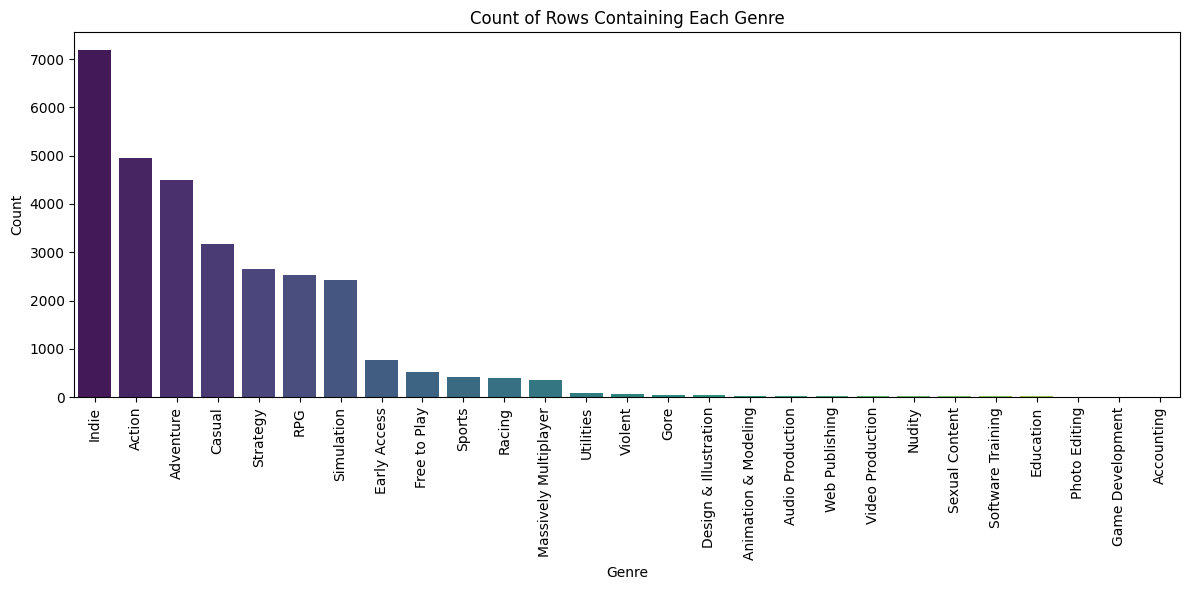

In [45]:
# Count how many times each genre appears in any list
genre_counts = {genre: df_filtered['Genres'].apply(lambda x: genre in x).sum() for genre in unique_genres}

# Convert to a DataFrame for easier plotting
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Sort by count for a cleaner plot
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts_df, x='Genre', y='Count', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Rows Containing Each Genre')
plt.tight_layout()
plt.show()

C:\Users\sayex\AppData\Local\Temp\ipykernel_12164\1466511309.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tag_counts_df, x='Tag', y='Count', palette='viridis')


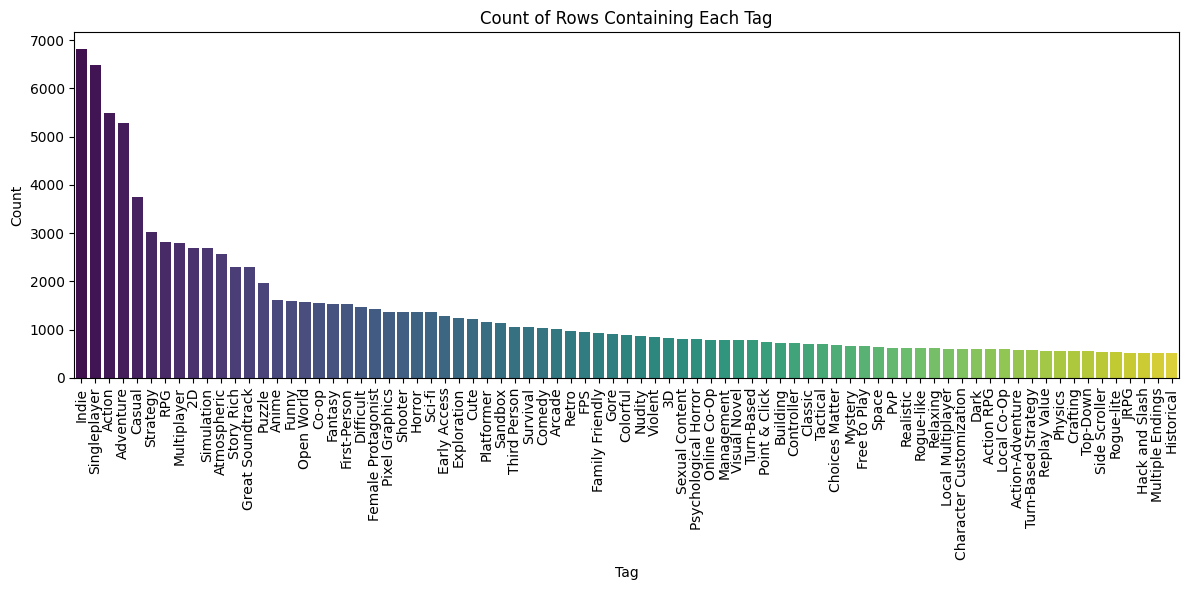

In [46]:
# Count how many times each genre appears in any list
unique_tags = set()
for tags in df_filtered['Tags']:
    unique_tags.update(tags)

# Count how many times each genre appears in any list
tag_counts = {genre: df_filtered['Tags'].apply(lambda x: genre in x).sum() for genre in unique_tags}

# Convert to a DataFrame for easier plotting
tag_counts_df = pd.DataFrame(list(tag_counts.items()), columns=['Tag', 'Count'])

# Sort by count for a cleaner plot
tag_counts_df = tag_counts_df.sort_values(by='Count', ascending=False)
tag_counts_df = tag_counts_df[tag_counts_df['Count'] >= 500]

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=tag_counts_df, x='Tag', y='Count', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Rows Containing Each Tag')
plt.tight_layout()
plt.show()

C:\Users\sayex\AppData\Local\Temp\ipykernel_12164\3367019693.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_counts_df, x='Category', y='Count', palette='viridis')


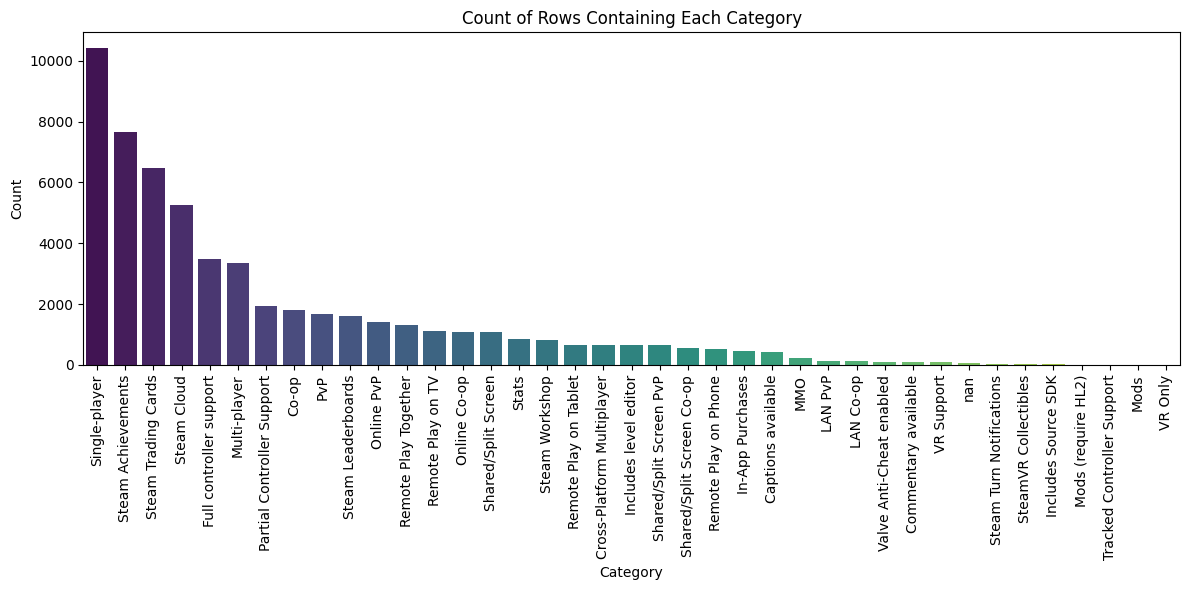

In [47]:
# Count how many times each genre appears in any list
unique_categories = set()
for tags in df_filtered['Categories']:
    unique_categories.update(tags)

# Count how many times each genre appears in any list
cat_counts = {genre: df_filtered['Categories'].apply(lambda x: genre in x).sum() for genre in unique_categories}

# Convert to a DataFrame for easier plotting
cat_counts_df = pd.DataFrame(list(cat_counts.items()), columns=['Category', 'Count'])

# Sort by count for a cleaner plot
cat_counts_df = cat_counts_df.sort_values(by='Count', ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=cat_counts_df, x='Category', y='Count', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Rows Containing Each Category')
plt.tight_layout()
plt.show()

In [48]:
#puts date into a yyyy-mm-dd format
df_filtered['Release date'] = pd.to_datetime(df_filtered['Release date'], errors='coerce')

C:\Users\sayex\AppData\Local\Temp\ipykernel_12164\3501572878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Release date'] = pd.to_datetime(df_filtered['Release date'], errors='coerce')


In [50]:
for col in df_filtered.columns:
    print(f"{col}: {df_filtered[col].dtype}")

AppID: int64
Name: object
Release date: datetime64[ns]
Estimated owners: float64
Peak CCU: int64
Required age: int64
Price: float64
DLC count: int64
About the game: object
Supported languages: object
Full audio languages: object
Reviews: object
Windows: bool
Mac: bool
Linux: bool
Metacritic score: int64
User score: int64
Positive: int64
Negative: int64
Score rank: float64
Achievements: int64
Recommendations: int64
Average playtime forever: int64
Average playtime two weeks: int64
Median playtime forever: int64
Median playtime two weeks: int64
Developers: object
Publishers: object
Categories: object
Genres: object
Tags: object


## DBSCAN Clustering

After looking at the visualizations, it was decided that clustering based on the 'Genres' and Categories' columns would be the most efficient as those columns contain a manageable amount of entries.